In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
df=pd.read_excel("Dry_Bean_Dataset.xlsx")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [26]:
df.shape

(13611, 17)

In [27]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [28]:
X=df.drop('Class',axis=1)
y=df['Class']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [31]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=10)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [32]:
y_pred=model.predict(X_test)
y_pred

array(['SEKER', 'BARBUNYA', 'SEKER', ..., 'DERMASON', 'CALI', 'DERMASON'],
      dtype=object)

In [33]:
y_pred.shape

(2723,)

In [34]:
print('accuracy_score : ',accuracy_score(y_test,y_pred))

accuracy_score :  0.9136981270657363


<Axes: >

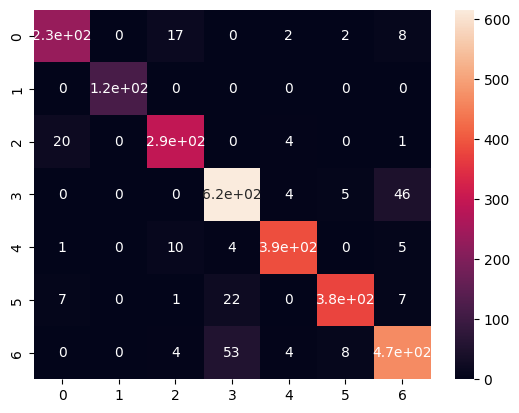

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [36]:
print('classification_report : \n',classification_report(y_test,y_pred))

classification_report : 
               precision    recall  f1-score   support

    BARBUNYA       0.89      0.89      0.89       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.90      0.92      0.91       317
    DERMASON       0.89      0.92      0.90       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.96      0.91      0.94       413
        SIRA       0.87      0.87      0.87       536

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723

